<a href="https://colab.research.google.com/github/hafsana271/DataScienceAssignmnt/blob/main/Missing_values_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv("/beer-servings (1).csv")

In [4]:
df.shape

(193, 7)

In [5]:
df.info

<bound method DataFrame.info of      Unnamed: 0      country  beer_servings  spirit_servings  wine_servings  \
0             0  Afghanistan            0.0              0.0            0.0   
1             1      Albania           89.0            132.0           54.0   
2             2      Algeria           25.0              0.0           14.0   
3             3      Andorra          245.0            138.0          312.0   
4             4       Angola          217.0             57.0           45.0   
..          ...          ...            ...              ...            ...   
188         188    Venezuela            NaN            100.0            3.0   
189         189      Vietnam          111.0              2.0            1.0   
190         190        Yemen            6.0              0.0            0.0   
191         191       Zambia           32.0             19.0            4.0   
192         192     Zimbabwe           64.0             18.0            4.0   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2                             0.7         Africa  
3                            12.4         Europe  
4                             5.9         Africa  
..                            ...            ...  
188                           7.7  South America  
189                           2.0           Asia  
190                           0.1           Asia  
191                           2.5         Africa  
192                           4.7         Africa  

[193 rows x 7 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [7]:
df.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [8]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [21]:
null_columns=df[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']]

In [22]:
null_columns.isna().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1


In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(null_columns)
null_columns=imputer.transform(null_columns)


In [26]:
null_columns=pd.DataFrame(null_columns,columns=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'])

In [27]:
null_columns.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(null_columns)
null_columns=imputer.transform(null_columns)

In [29]:
null_columns=pd.DataFrame(null_columns,columns=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'])

In [30]:
null_columns.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [31]:
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [32]:
categorical_cols=df.drop(['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'],axis=1,inplace=True)

In [34]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [37]:
df=pd.concat([null_columns,df],axis=1)
df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,217.0,57.0,45.0,5.9,Angola,Africa


In [54]:
df=pd.read_csv('/beer-servings (1).csv')

In [55]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [56]:
df['beer_servings']=df['beer_servings'].fillna(df['beer_servings'].median())


In [57]:
df['beer_servings'].isna().sum()

0

In [58]:
df.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,0
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [66]:
for col in ['beer_servings','wine_servings','total_litres_of_pure_alcohol']:
    df[col]=df[col].fillna(df[col].median())

In [62]:
from matplotlib import pyplot as plt

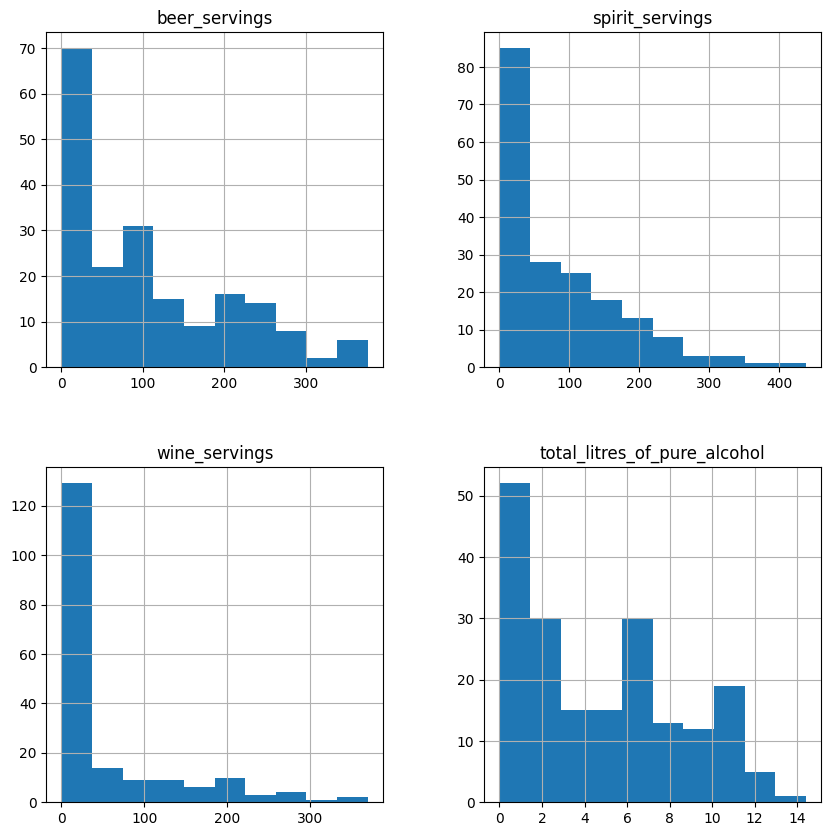

In [63]:
freeplot=df.select_dtypes(include=['float'])
freeplot.hist(figsize=(10,10))
plt.show()


In [67]:
df.shape

(193, 7)

In [69]:
df["Unnamed: 0"].nunique()

193

In [73]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [74]:
df.drop(["country"],axis=1,inplace=True)